### Урок 8. Снижение размерности данных

1. Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.
2. Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [26]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

In [27]:
X, y = load_iris(return_X_y=True)

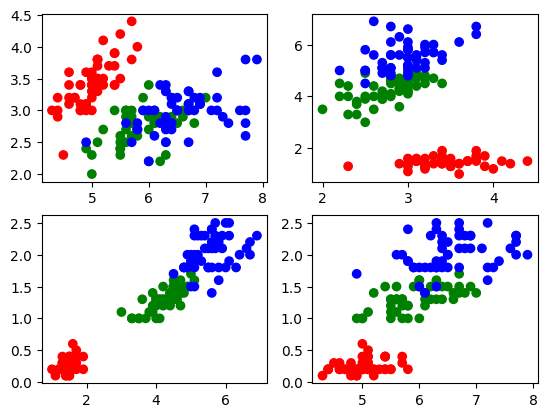

In [28]:
cmap = ListedColormap(['red', 'green', 'blue'])
figure, axis = plt.subplots(2, 2)
# plt.figure(figsize=(7, 7))
axis[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
axis[0, 1].scatter(X[:, 1], X[:, 2], c=y, cmap=cmap)
axis[1, 0].scatter(X[:, 2], X[:, 3], c=y, cmap=cmap)
axis[1, 1].scatter(X[:, 0], X[:, 3], c=y, cmap=cmap)
plt.show()

Будем обучать модель SGDClassifier.

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
model = linear_model.SGDClassifier(alpha=0.001, random_state = 0)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test, model_predictions))
print(metrics.classification_report(y_test, model_predictions))

0.6
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        14
           1       0.00      0.00      0.00        18
           2       0.76      1.00      0.87        13

    accuracy                           0.60        45
   macro avg       0.42      0.67      0.51        45
weighted avg       0.38      0.60      0.46        45



Проверим модуль после PCA, оставив 3 компоненты

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
XPCAreduced = pca.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(XPCAreduced, y, test_size=0.3, random_state=1)

In [33]:
model = linear_model.SGDClassifier(alpha=0.001, random_state = 0)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test, model_predictions))
print(metrics.classification_report(y_test, model_predictions))

0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.78      0.85        18
           2       0.75      0.92      0.83        13

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



Как видим после применения метода главных компонент качетво модели значительно возросло.

---

#### Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd()

In [34]:
class SingPCA:
    """Класс метода главных компонент с использование сингулярного разложения."""
    def __init__(self, n_components: int=None):
        """
        Конструктор
        int n_components: Количество компонент
            - default: All
        """
        self.n_components = n_components
        self._w = []

    def fit(self, X):
        """
        Нахождение матрицы весов
        :param X:
        :return:
        """
        if not self.n_components:
            self.n_components = X.shape[1]
        X_centered = self._centering(X)
        p, d, q = np.linalg.svd(X_centered, full_matrices=False)
        self._w = q.T[:,:self.n_components]
        # test = p[:, :self.n_components]*d[:self.n_components]
        # print(self.transform(X)[0])
        # print(test[0])

    def _centering(self, X):
        """
        Центрирование матрицы признаков
        np.array X: Матрица признаков
        np.array Центрированная матрица признаков
        """
        return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    def transform(self, X):
        """
        Трансформирование исходной матрицы
        :param X:
        :return:
        """
        return self._centering(X) @ self._w

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [35]:
X, y = load_iris(return_X_y=True)

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(XPCAreduced, y, test_size=0.3, random_state=1)

In [37]:
spca = SingPCA(3)
X_train = spca.fit_transform(X_train)
X_test = spca.transform(X_test)

In [38]:
model = linear_model.SGDClassifier(alpha=0.001, random_state = 0)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test, model_predictions))
print(metrics.classification_report(y_test, model_predictions))

0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      0.83      0.83        18
           2       0.77      0.77      0.77        13

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



Сопадает с результатми из библиотеки sklearn. Отлично.